In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('Housing.csv')

In [ ]:
# Perform descriptive statistics on the dataset
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [ ]:
# Check for missing values and deal with them
df = df.dropna()


In [ ]:
# Find the outliers and replace them outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-7-4b7b2fe367f7>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-7-4b7b2fe367f7>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-7-4b7b2fe367f7>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
# Check for categorical columns and perform encoding
df = pd.get_dummies(df)

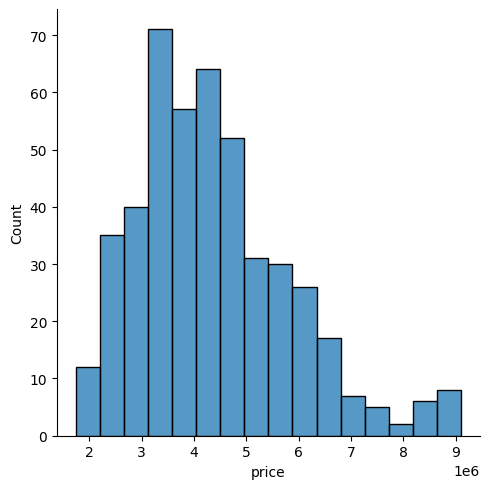

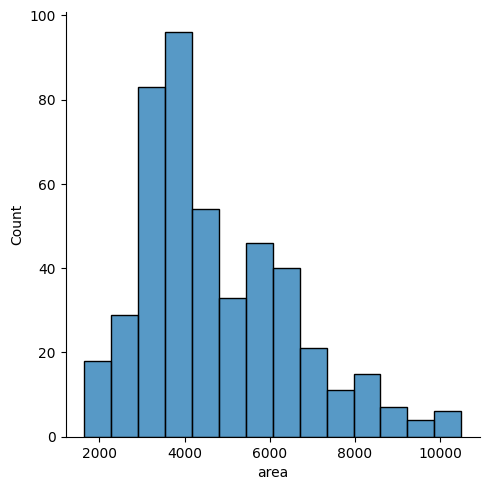

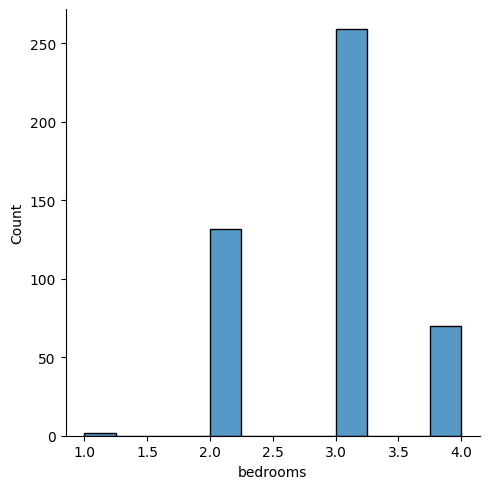

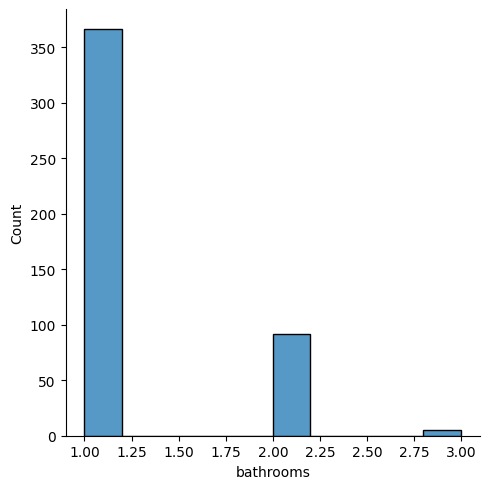

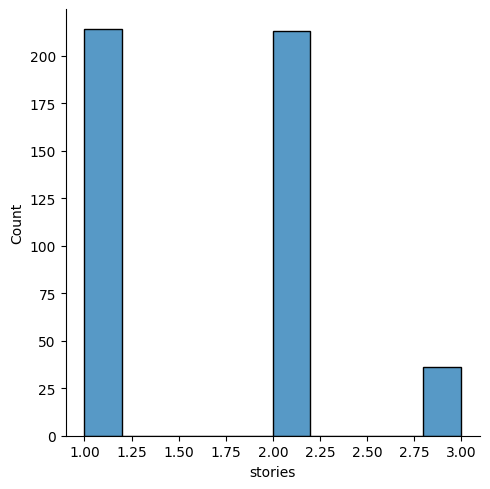

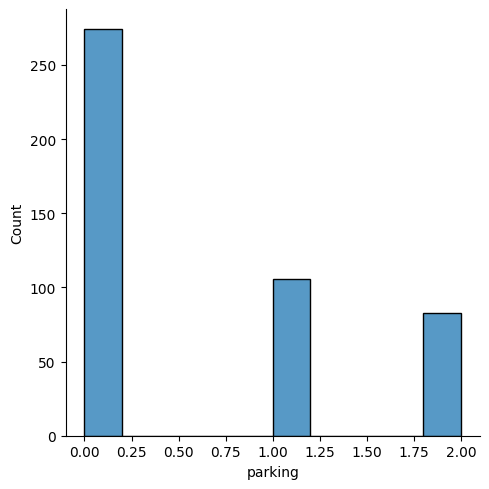

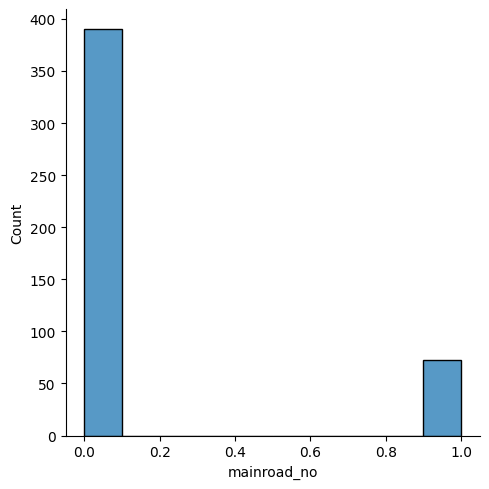

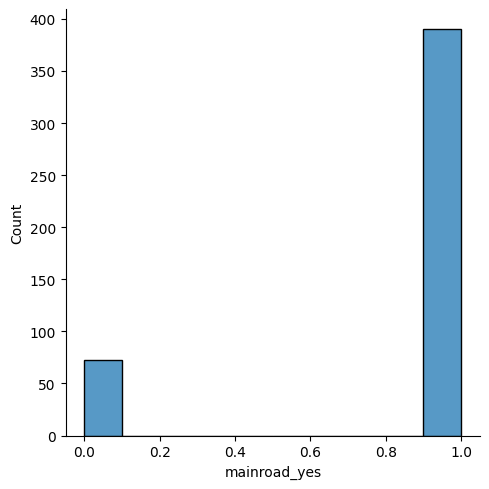

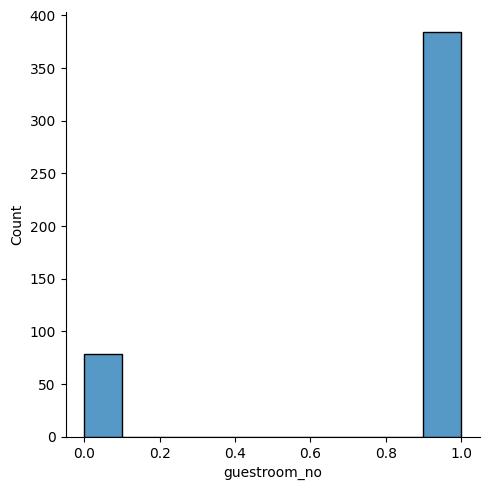

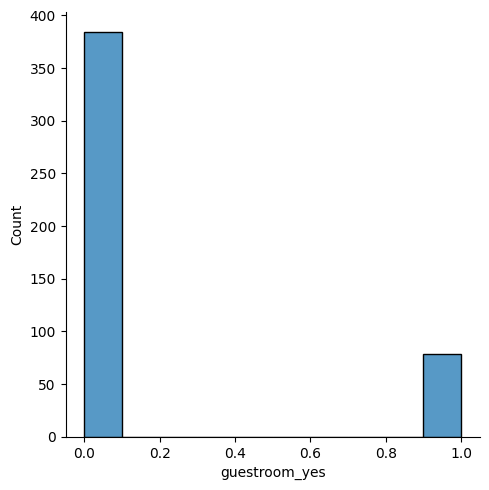

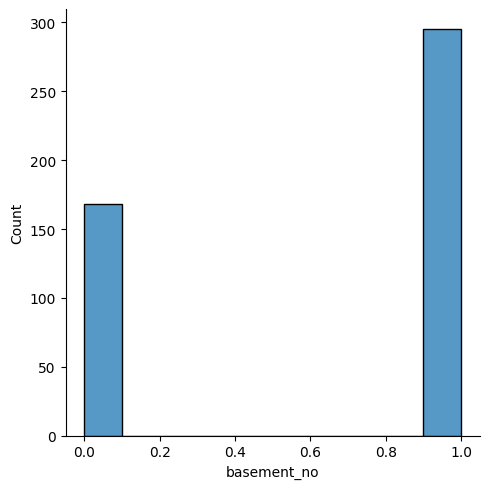

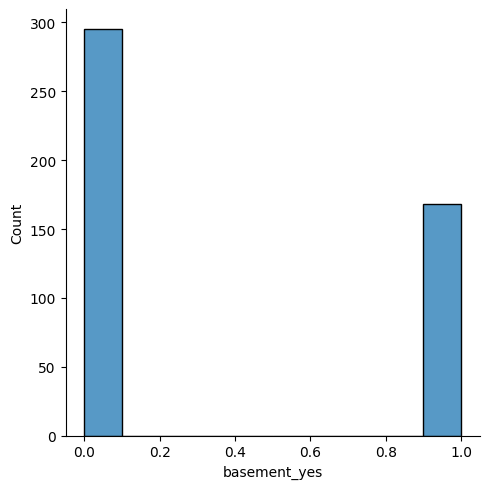

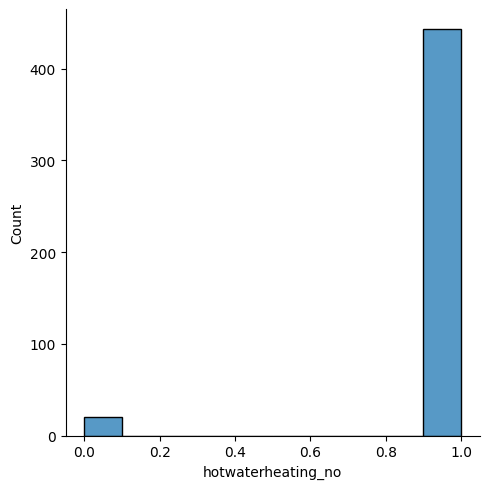

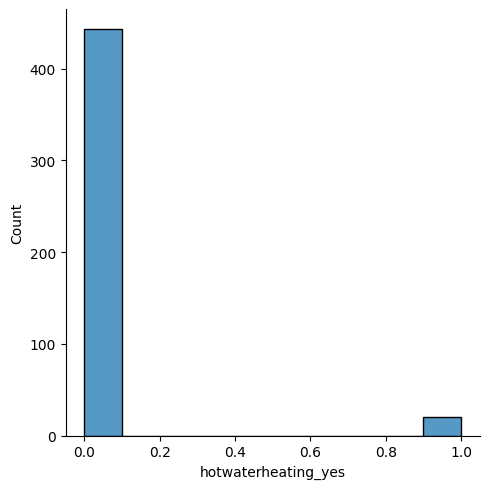

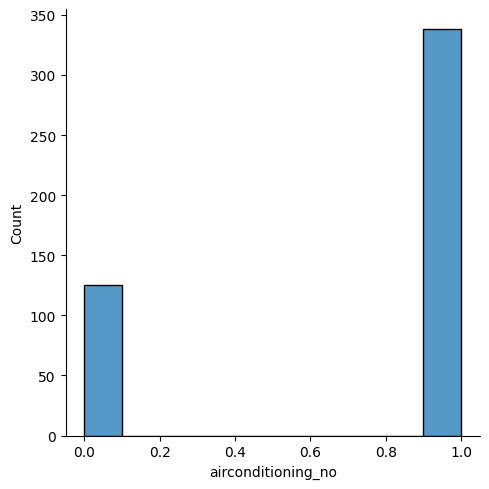

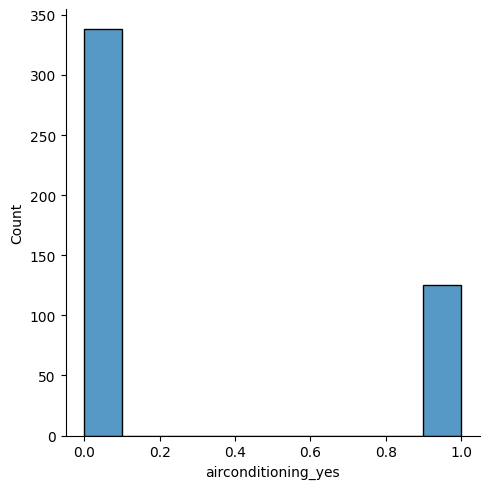

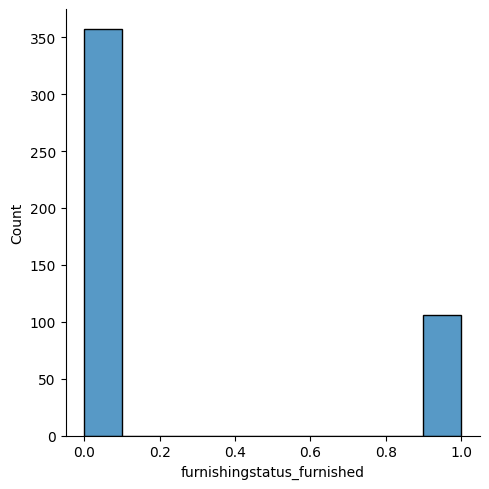

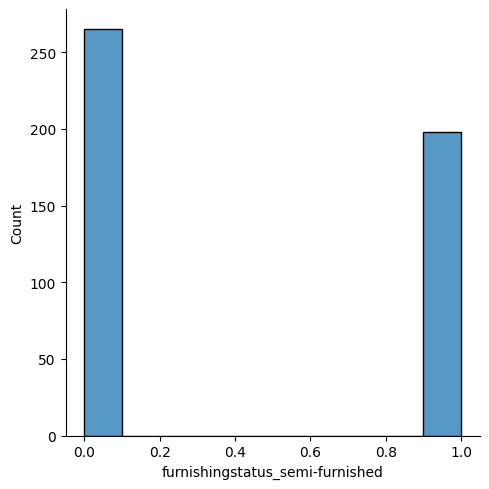

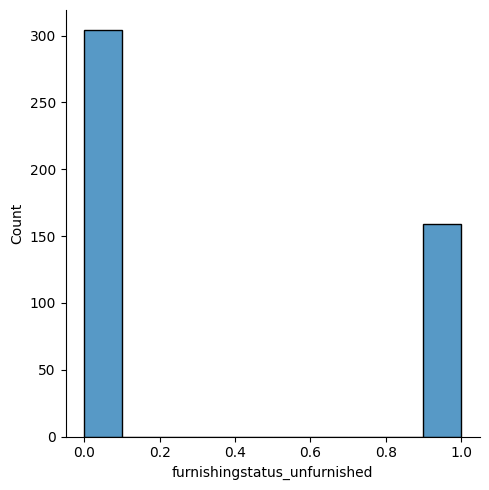

In [ ]:
# Perform visualizations

# Univariate Analysis
for col in df.columns:
    sns.displot(df[col])
    plt.show()

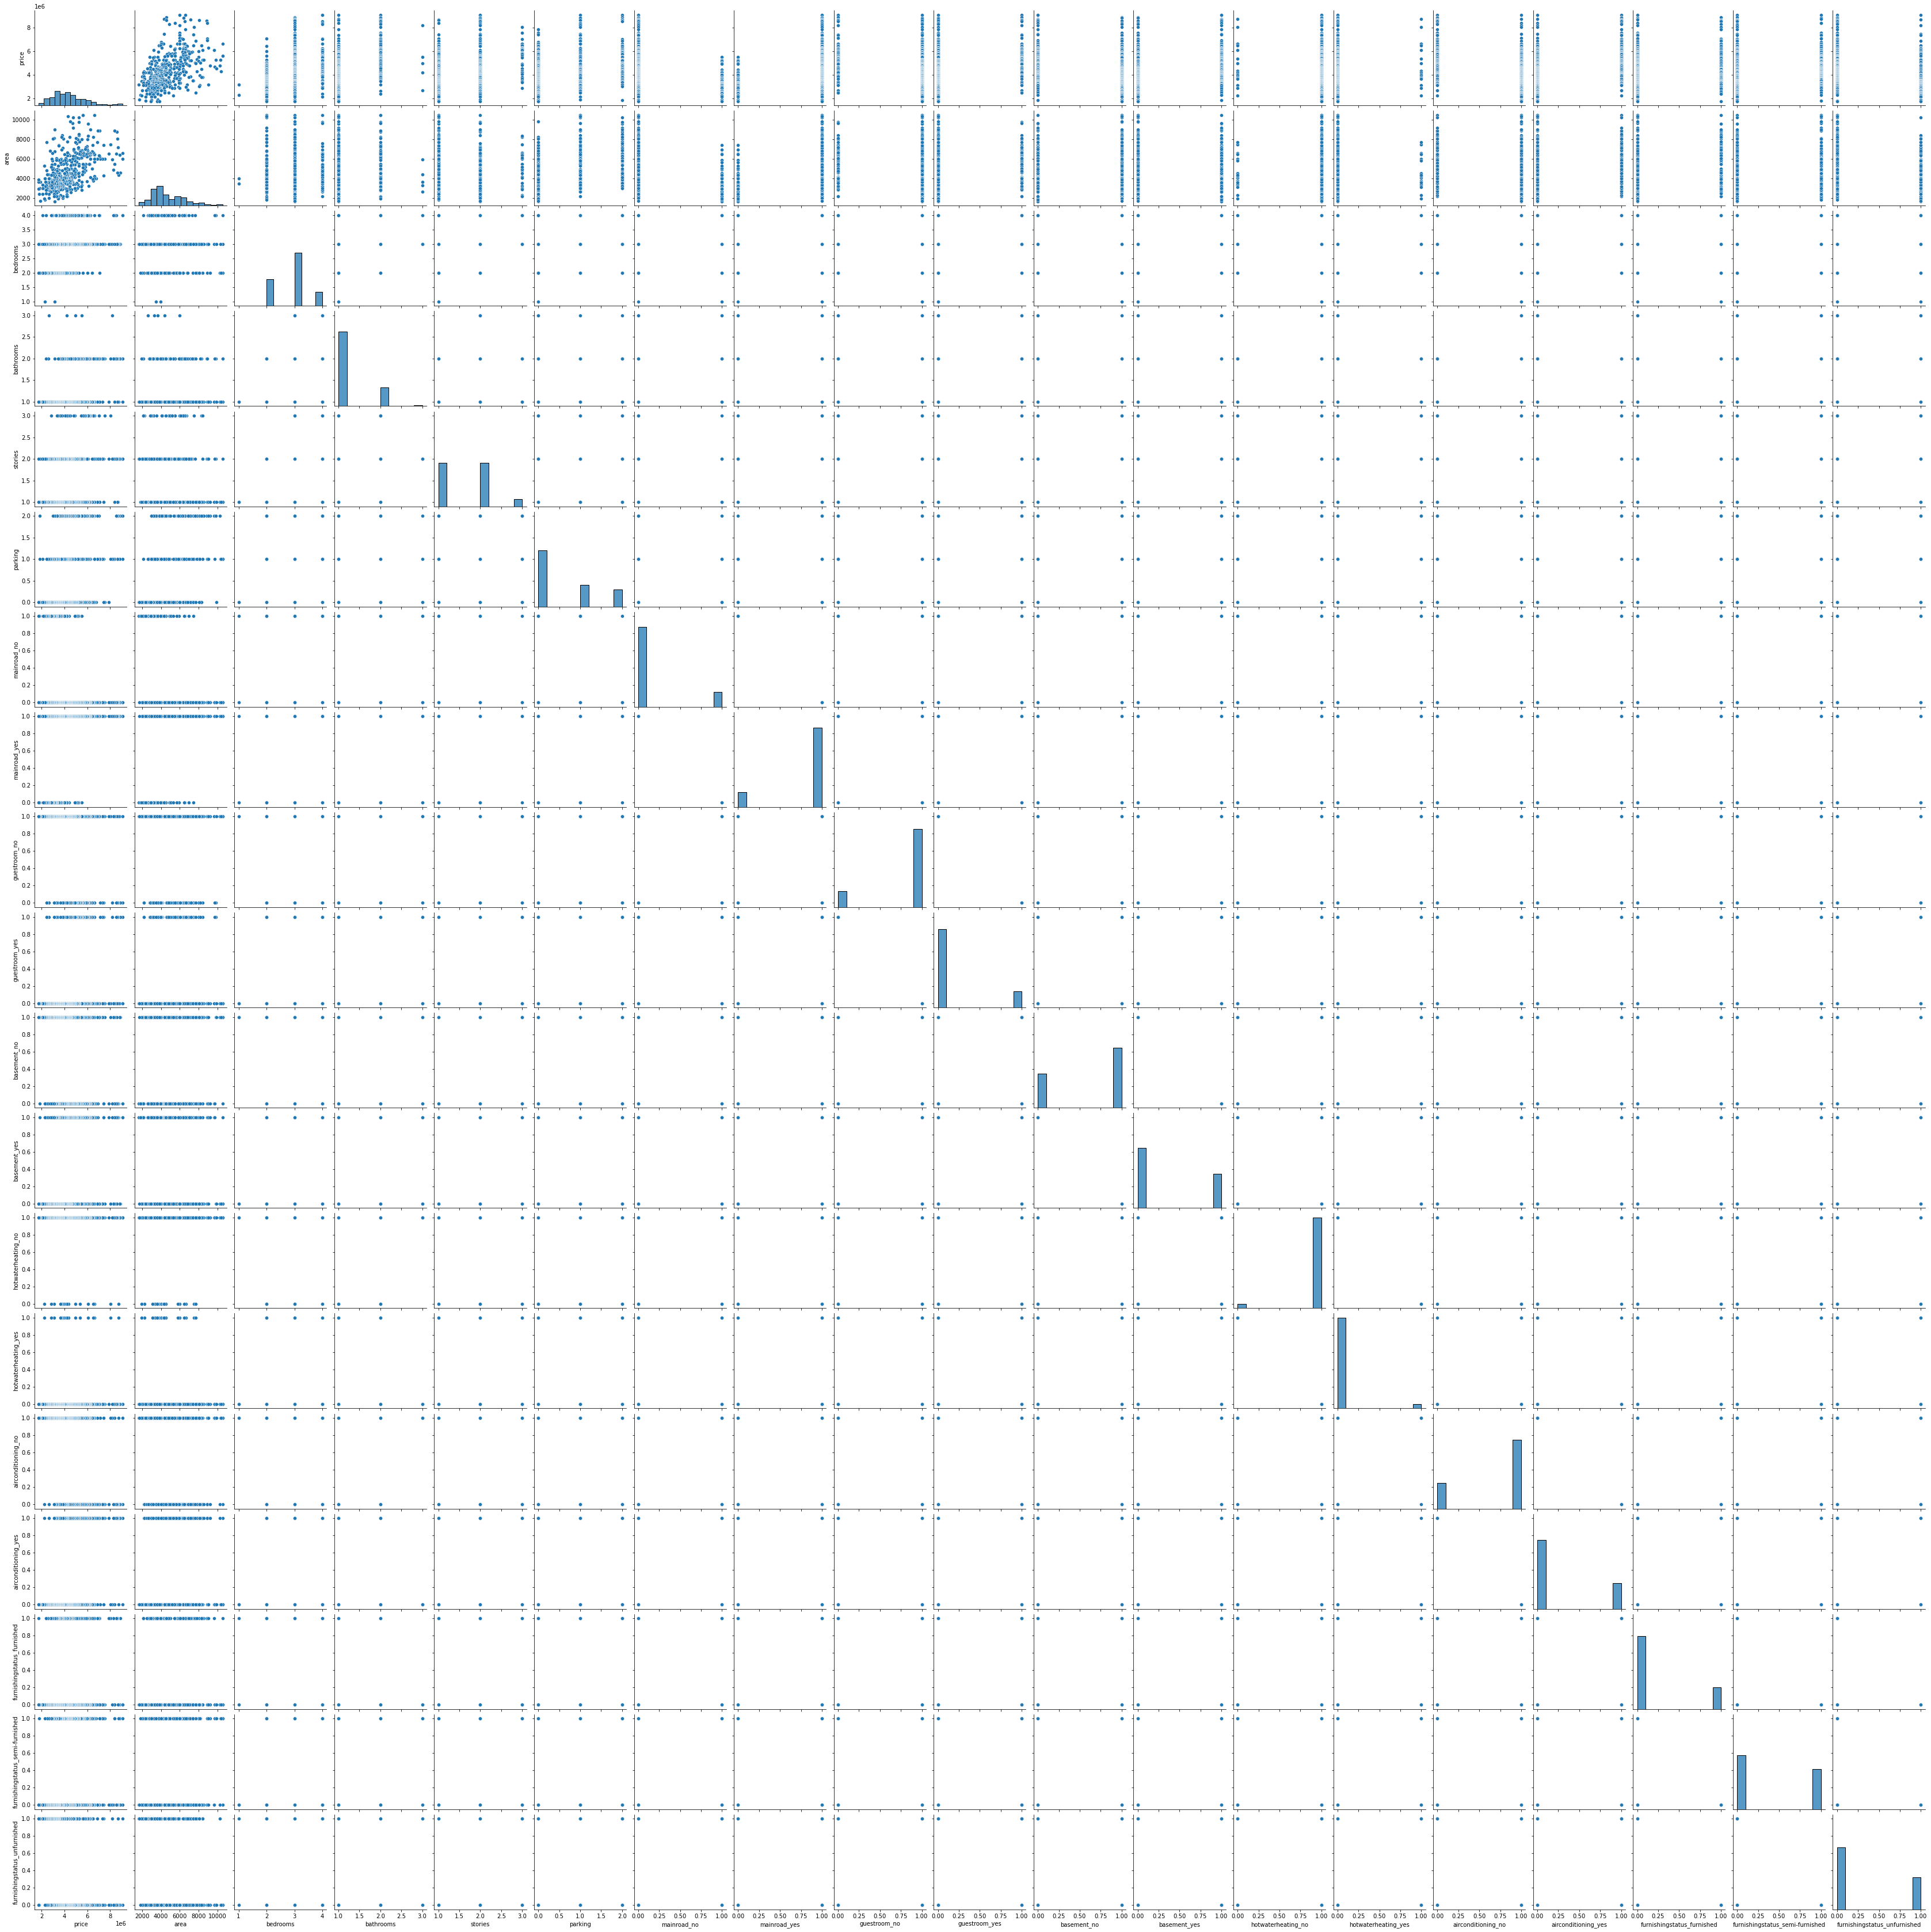

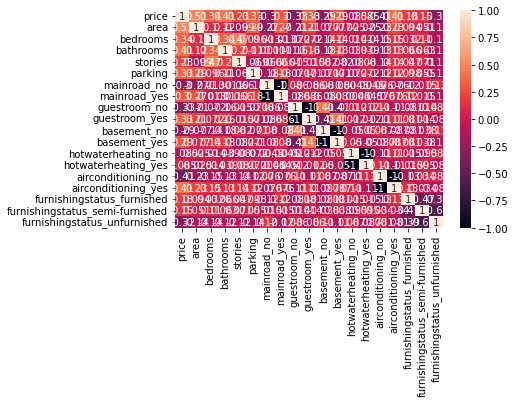

In [ ]:
# Bivariate Analysis
sns.pairplot(df)
plt.show()

# Multivariate Analysis
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# Split the data into dependent and independent variables
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
# Scale the independent variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Build the model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Test the model
y_pred = model.predict(X_test)

In [ ]:
# Measure the performance using metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 934975.3239269637
